<a href="https://colab.research.google.com/github/FLCL4LIFE/Work-Done-in-Classes/blob/main/PredictiveAnalytics_Ryan_Mehdian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
##############################################
# Programmer Name: Ryan Mehdian 
# Class: Cis 3150
# Programming Assignment 
# Date:11/17/20
#
#
# Description: 
##############################################

Use the below [auto-mpg][mpg] data to answer the below questions:


> url = 'https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv'


----
[mpg]:https://archive.ics.uci.edu/ml/datasets/auto+mpg

### **Setup your notebook but importing the required packages and settings in the below cell**
- Enable inline graph, set seaborn style to white, ignore warning and import required packages

In [51]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

### **Load the data into pandas data frame `auto` and display the first 5 rows**

In [52]:
df = sns.load_dataset('mpg')
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
261,18.1,6,258.0,120.0,3410,15.1,78,usa,amc concord d/l
223,15.5,8,318.0,145.0,4140,13.7,77,usa,dodge monaco brougham
51,30.0,4,79.0,70.0,2074,19.5,71,europe,peugeot 304
148,26.0,4,116.0,75.0,2246,14.0,74,europe,fiat 124 tc
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m


## **Exploratory Data Analysis (EDA) Section**


### **Check for missing values and remove rows with missing values**



In [53]:
df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### **Calculate the 5 number summary for the `mpg` column**

In [54]:
mpg = pd.DataFrame(sns.load_dataset("mpg"))

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### **Create a histogram for `mpg` column with rugplot as shwon below**

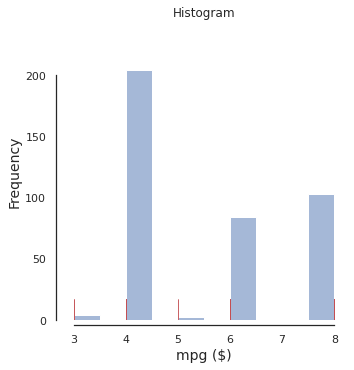

In [55]:
sns.displot(mpg['cylinders'], 
            rug=True,
            rug_kws={"color": "r", "alpha":0.5, "linewidth": 1, "height":0.07 }, 
            alpha = .5,);


plt.title('Histogram')
plt.xlabel("mpg (\$)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
sns.despine(offset=5, trim=True)


### **Create a multi rugplot for `mpg` column with seperating data by cylinders, as shown below.** 
- In a separate text cell discuss 2 to 3 insights you gained from the visualization plot



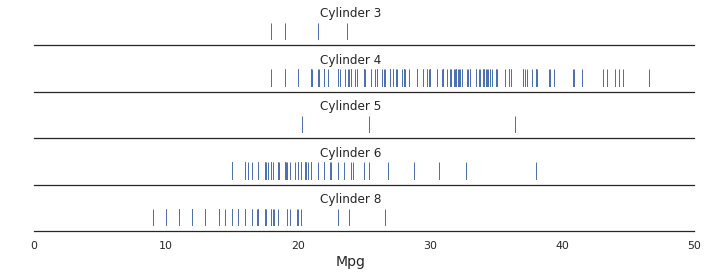

In [56]:
data_mpg = []
data_mpg.append(mpg.loc[mpg.cylinders == 3,['mpg']] )
data_mpg.append(mpg.loc[mpg.cylinders == 4,['mpg']] )
data_mpg.append(mpg.loc[mpg.cylinders == 5,['mpg']] )
data_mpg.append(mpg.loc[mpg.cylinders == 6,['mpg']] )
data_mpg.append(mpg.loc[mpg.cylinders == 8,['mpg']] )

fig, axs = plt.subplots(figsize=(10, 4.0), nrows=5, ncols=1, sharex=True)

clr = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"]]
ttl = ['Cylinder 3', 'Cylinder 4','Cylinder 5', 'Cylinder 6', 'Cylinder 8']

for idx, data in enumerate(data_mpg):
  sns.rugplot(ax = axs[idx], a=data['mpg'], height=1, lw=1)
  
  axs[idx].set_yticks([])
  axs[idx].set_xlim(-2, 50)
  axs[idx].set_xlabel('Mpg', fontsize=14) 
  axs[idx].set_title(ttl[idx])
  
  sns.despine(ax=axs[idx], left=True, offset=5, trim=True)

plt.tight_layout()

### Create a box plot for mpg vs Cylinders as shown below

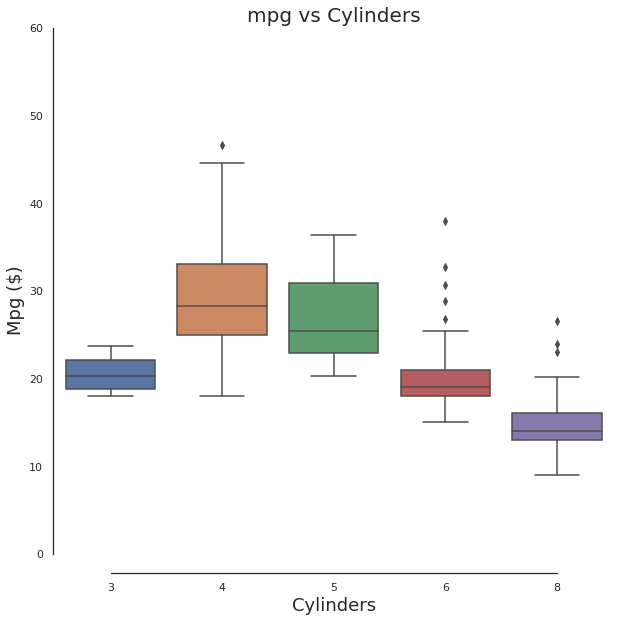

In [49]:
fig, axs = plt.subplots(figsize=(10, 10))

# Boxplot
sns.boxplot(x=df['cylinders'],y=df['mpg'])

# Define x-axis limits and label
axs.set_ylim(-2, 60)
axs.set_xlabel('Cylinders', fontsize=18)
axs.set_ylabel('Mpg (\$)', fontsize=18)

# Title each plot
axs.set_title('mpg vs Cylinders', ha='center', fontsize=20)

# Clean up each plot
sns.despine(ax=axs, offset=2, trim=True)

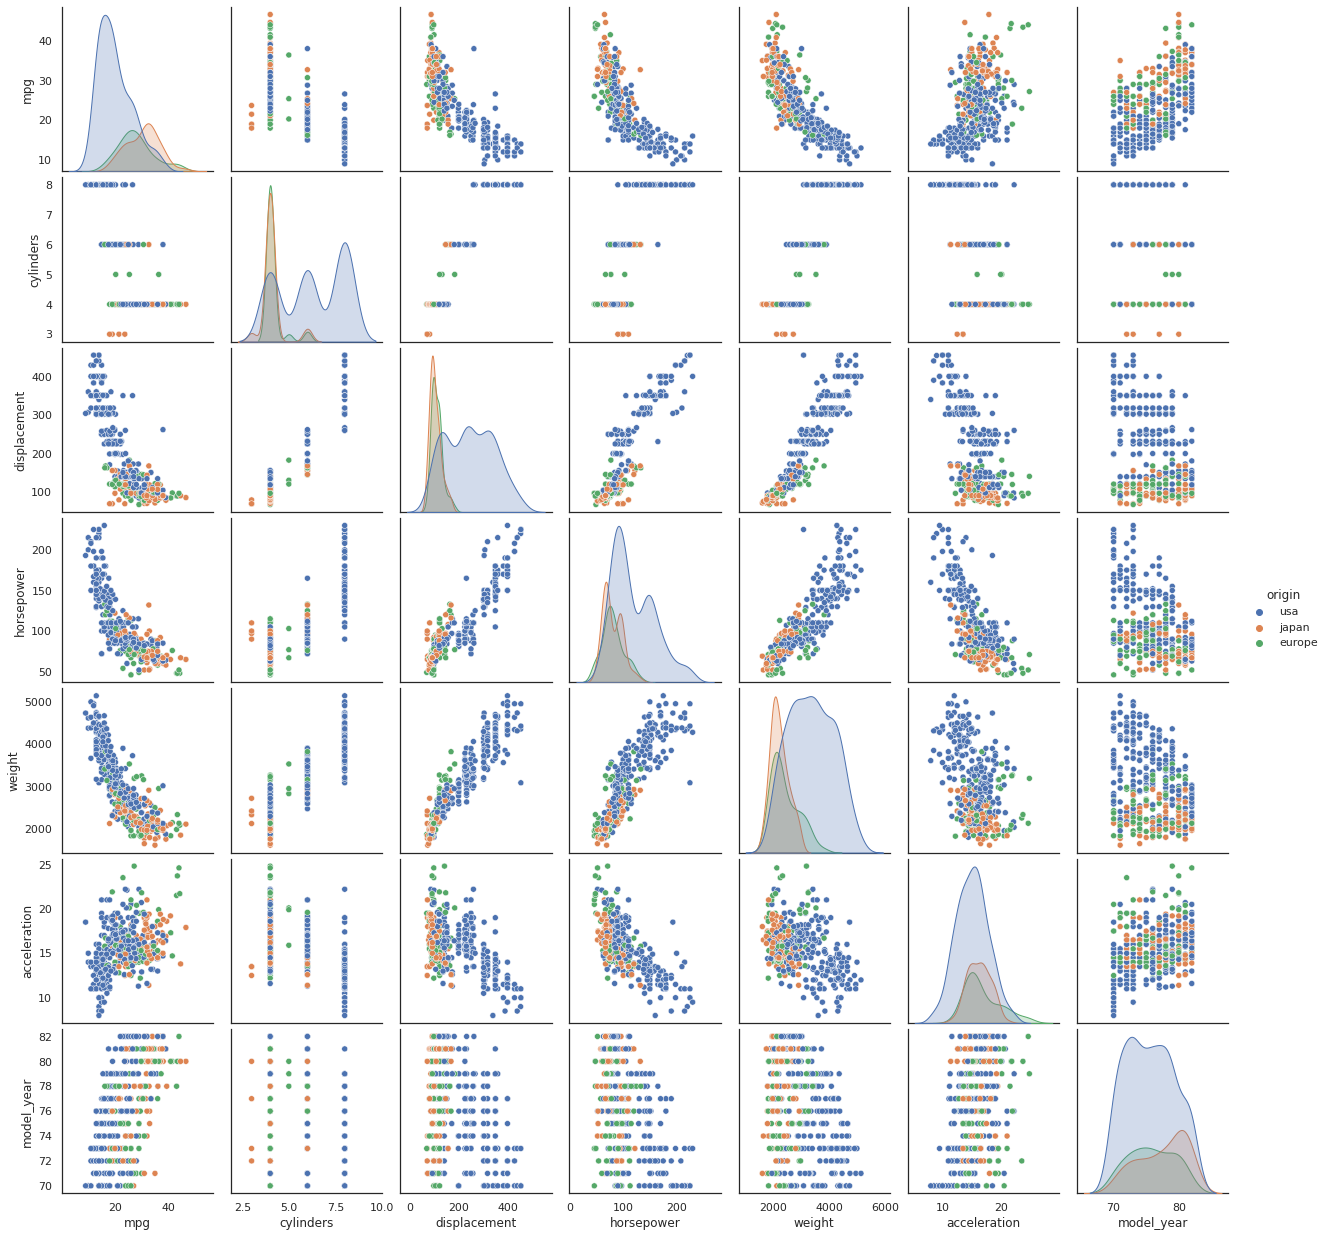

In [57]:
sns.pairplot(mpg, hue='origin') ;

In [58]:
def corrbubble(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_value = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.8, cmap="bwr",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 50 + 5
    ax.annotate(corr_value, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
    
def scatter_corrbubble(mpg):
    sns.set(style='white', font_scale=1.6);
    g = sns.PairGrid(df, aspect=1.4, diag_sharey=False);
    g.map_lower(sns.regplot, lowess=True, ci=True, line_kws={'color': 'red'});
    g.map_diag(sns.distplot, kde_kws={'color': 'darkblue'});
    g.map_upper(corrbubble);



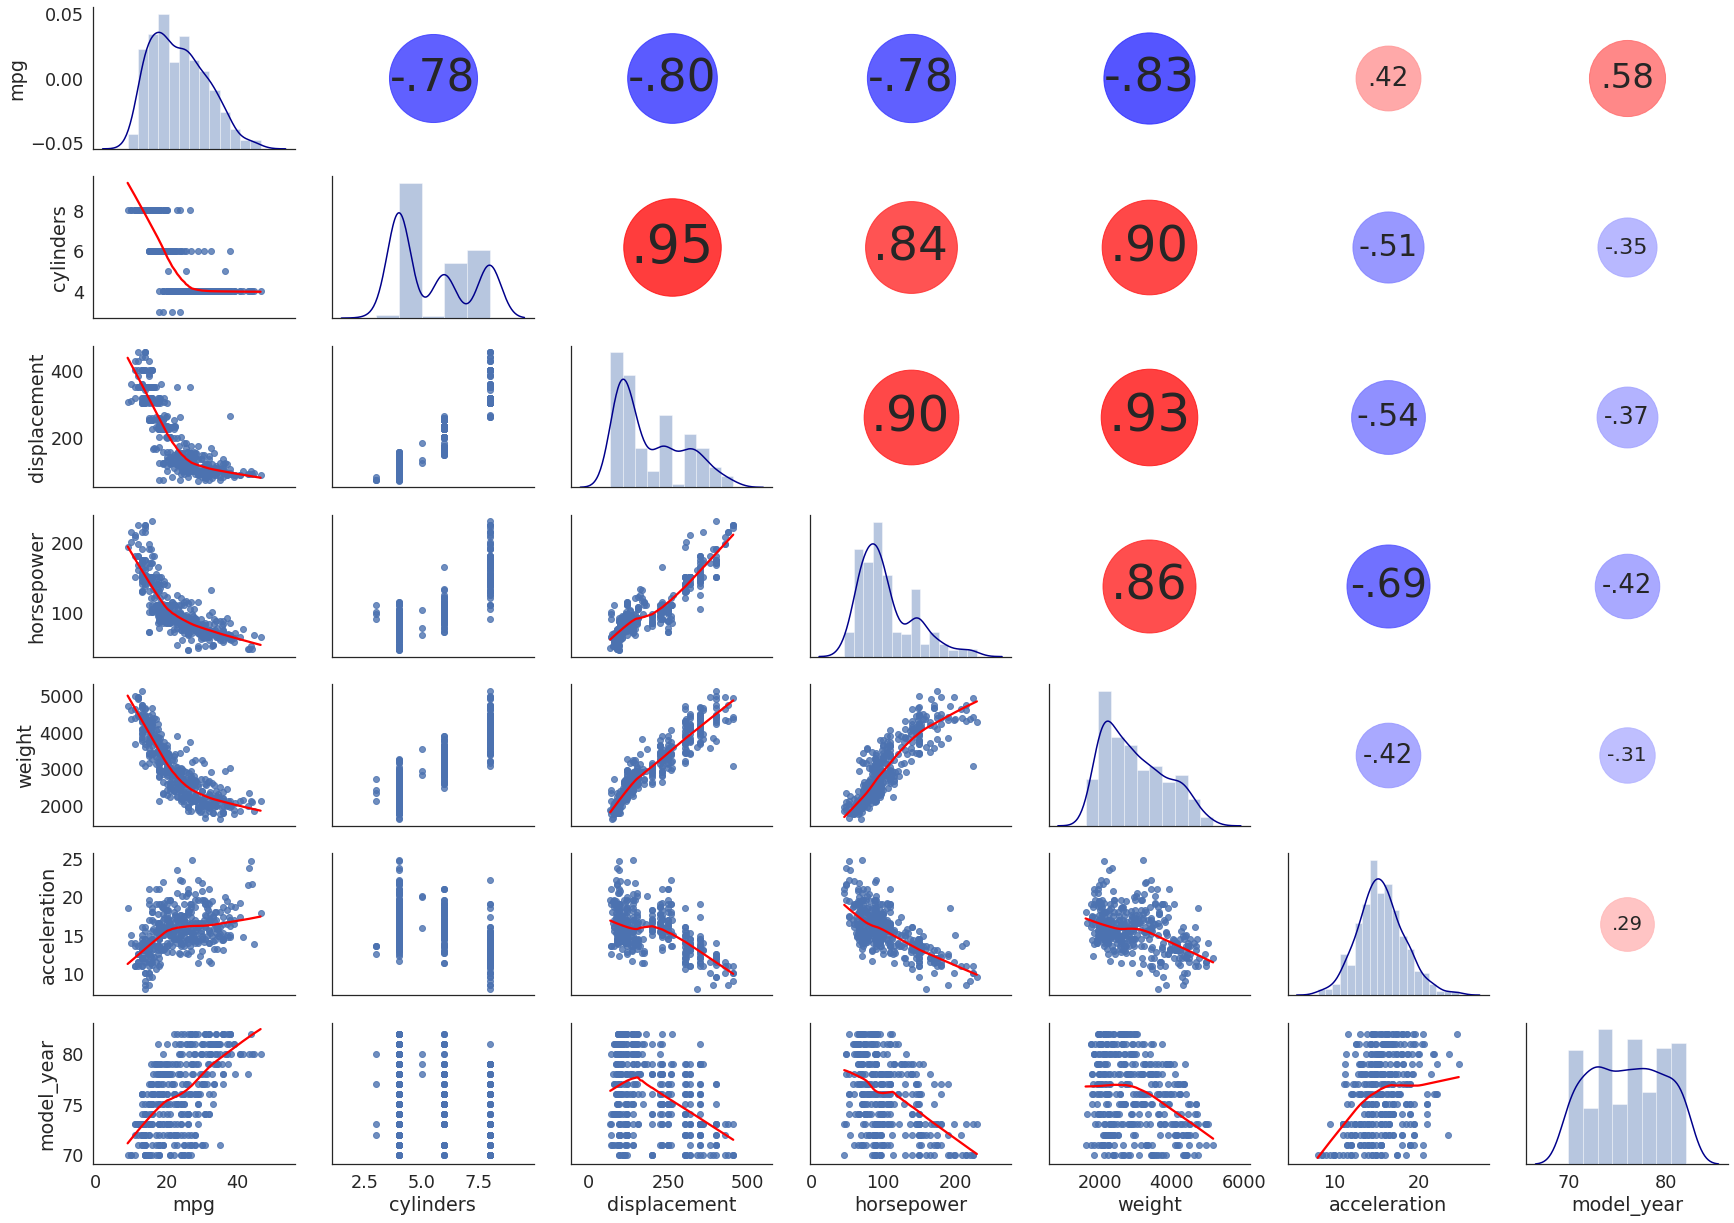

In [28]:
scatter_corrbubble(mpg)

From the data presented I have noticed that the four cylinder car seems to be the best as mpg but lower in horse power, also the weight of the care increases with most higher cylinder cars.

The insight i have gained form this chart is that japense cars are by far the lightest. Also that it is confusding to see all the diffirent possibilities of these graphs. 

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white")

In [30]:
tdf = sns.load_dataset('mpg')

# Display several random rows
tdf.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
206,26.5,4,140.0,72.0,2565,13.6,76,usa,ford pinto
47,19.0,6,250.0,100.0,3282,15.0,71,usa,pontiac firebird
178,23.0,4,120.0,88.0,2957,17.0,75,europe,peugeot 504


In [31]:
tdf.shape

(398, 9)

In [32]:
ind_data = tdf['mpg'].values.reshape(-1, 1)
ind_data[:10]

array([[18.],
       [15.],
       [18.],
       [16.],
       [17.],
       [15.],
       [14.],
       [14.],
       [14.],
       [15.]])

In [33]:
dep_data = tdf['cylinders'].values.reshape(-1, 1)
dep_data[:10]

array([[8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8]])

### **Split the data into training and testing use 0.3 for test size.**

In [34]:
from sklearn.model_selection import train_test_split
frac = 0.3

In [35]:
ind_train, ind_test, dep_train, dep_test \
    = train_test_split(ind_data, dep_data, test_size=frac, random_state=1)

In [36]:
ind_train.shape, ind_test.shape

((278, 1), (120, 1))

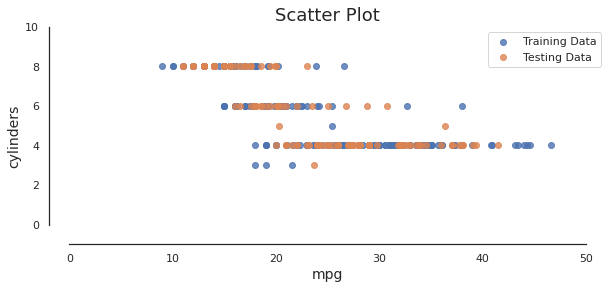

In [37]:
plt.figure(figsize=(10, 4))

sns.regplot(ind_train, dep_train, label='Training Data', fit_reg=False);
sns.regplot(ind_test, dep_test, label='Testing Data',fit_reg=False);

# Decorate final plot
plt.xlabel("mpg", fontsize=14)
plt.ylabel("cylinders", fontsize=14)
plt.title("Scatter Plot", fontsize=18)
plt.xlim(-2, 52)
plt.ylim(-1, 10)
plt.legend()    
sns.despine(trim=True)

### **Fit a Multi Linear Regression (MLR) model using the train data and compute the (Coefficient of Determination)**


In [38]:
from sklearn.linear_model import LinearRegression

# Create and fit our linear regression model to training data
model = LinearRegression(fit_intercept=True)
model.fit(ind_train, dep_train)

LinearRegression()

In [39]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

df = pd.DataFrame(mpg,columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin'])

X = df[['mpg','cylinders']] 
Y = df['displacement']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

New_mpg = 20
New_cylinders = 5
print ('Predicted mpg: \n', regr.predict([[New_mpg ,New_cylinders]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -28.173801699850515
Coefficients: 
 [-2.24206242 50.29004462]
Predicted mpg: 
 [178.43517296]
                            OLS Regression Results                            
Dep. Variable:           displacement   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     2130.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          2.66e-212
Time:                        23:07:54   Log-Likelihood:                -1922.9
No. Observations:                 398   AIC:                             3852.
Df Residuals:                     395   BIC:                             3864.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [40]:
from sklearn.linear_model import LinearRegression

# Create and fit our linear regression model to training data
model = LinearRegression(fit_intercept=True)
model.fit(ind_train, dep_train)

LinearRegression()

In [41]:
model.coef_

array([[-0.16224198]])

In [42]:
model.intercept_

array([9.23190509])

In [43]:
print(f"mpg = {model.coef_[0][0]:4.2f} cylinder + {model.intercept_[0]:4.2f}")

mpg = -0.16 cylinder + 9.23


In [44]:
results = model.predict(ind_test)

# Compute score and display result (Coefficient of Determination  R^2)
score = 100.0 * model.score(ind_test, dep_test )
print(f'LR Model score R^2 = {score:5.1f}%')

LR Model score R^2 =  63.1%


### **Calculate MSE and RMSE for the MLR model**
- First cacluate the results using model.predict and use metrics package for calculation
- In a separate text cell interpert the RMSE value

In [45]:
from sklearn import metrics
print('MSE :', metrics.mean_squared_error(dep_test,results))

MSE : 1.1358396062826495


In [46]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(dep_test,results)))

RMSE : 1.065757761539952


### **Build a decision tree model and fine tune `max_depth` hyperparameter to provide optimum values for accuracy, MSE and RMSE.**
- In a separate text cell discuss the process and the results compared to MLR model.

In [47]:
from sklearn import tree

# Construct the tree regressor
dtr = tree.DecisionTreeRegressor(max_depth=3)
dtr

DecisionTreeRegressor(max_depth=3)

In [48]:
dtr.fit(ind_train, dep_train)

# Compute model predictions for test data
results = dtr.predict(ind_test)

# Compute and display score from test data
score = 100.0 * dtr.score(ind_test, dep_test)
print(f'DT regression accuracy = {score:5.1f}%')

DT regression accuracy =  78.5%
